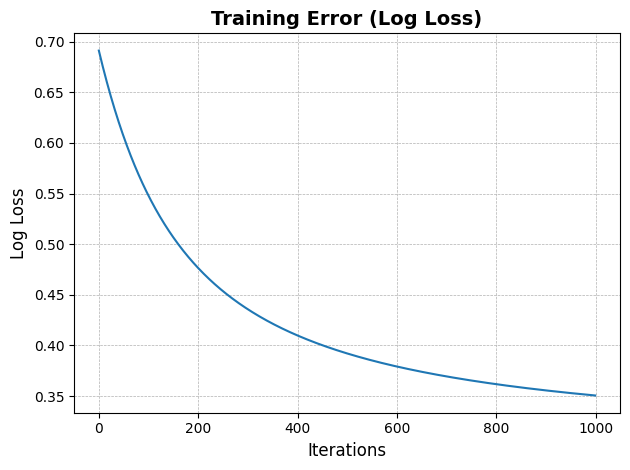

Confusion Matrix:
[[41  9]
 [ 6 44]]
Accuracy: 0.8500
Precision: 0.8302
Recall: 0.8800
F1 Score: 0.8544


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 2: Compute cost (Log-loss)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    epsilon = 1e-5  # Avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
    return cost

# Step 3: Gradient Descent (vectorized)
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Step 4: Prediction function
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= threshold).astype(int)

# Step 5: Plot error curve
def plot_error_curve(cost_history):
    plt.plot(cost_history)
    plt.title('Training Error (Log Loss)', fontsize=14, fontweight='bold')
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Log Loss', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Step 6: Evaluation metrics
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

def main():
    # Generate synthetic binary classification data
    X, y = make_classification(n_samples=500, n_features=4, n_informative=3, 
                                n_redundant=0, n_classes=2, random_state=42)

    # Train/test split (single-fold cross-validation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias term (intercept)
    X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    # Initialize parameters
    theta = np.zeros(X_train_bias.shape[1])

    # Hyperparameters
    learning_rate = 0.01
    iterations = 1000

    # Train model
    theta, cost_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

    # Plot error curve
    plot_error_curve(cost_history)

    # Predictions
    y_pred = predict(X_test_bias, theta)

    # Evaluation
    evaluate_model(y_test, y_pred)

if __name__ == "__main__":
    main()
